# Carbon Activity

This example shows the calculation of the carbon activity for methane mixtures
in thermodynamic equilibrium.

In [1]:
import gaspype as gp
import numpy as np
import matplotlib.pyplot as plt

Setting temperatures and pressure:

In [2]:
t_range = np.array([600, 700, 800, 900, 1100, 1500])  # °C

p = 1e5  # Pa

fs = gp.fluid_system(['H2', 'H2O', 'CO2', 'CO', 'CH4'])

Equilibrium calculation for methane steam mixtures:

In [3]:
ratio = np.linspace(0.01, 1.5, num=128)

fl = gp.fluid({'CH4': 1}, fs) + ratio * gp.fluid({'H2O': 1}, fs)

gaspype.carbon_activity supports currently only 0D fluids therefore we build this helper function:

In [4]:
def partial_c_activity(fl: gp.fluid, t: float, p: float):
    fls = fl.array_composition.shape

    eq_fl = gp.equilibrium(fl, t, p)

    ret = np.zeros(fls[0])
    for i in range(fls[0]):
        ret[i] = gp.carbon_activity(gp.fluid(eq_fl.array_composition[i,:], fs), t, p)

    return ret

Now we use the helper function to calculate the carbon activitx for all
compositions in equilibrium_h2o times all temperatures in t_range:

In [5]:
carbon_activity = np.vstack([partial_c_activity(fl, tc + 273.15, p) for tc in t_range])

Plot carbon activities, a activity of > 1 means there is thermodynamically the formation of sold carbon favored.

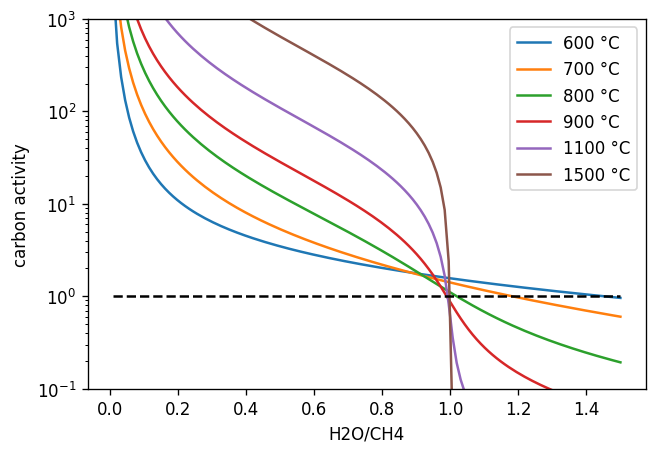

In [6]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.set_xlabel("H2O/CH4")
ax.set_ylabel("carbon activity")
ax.set_ylim(1e-1, 1e3)
ax.set_yscale('log')
ax.plot(ratio, carbon_activity.T)
ax.hlines(1, np.min(ratio), np.max(ratio), colors='k', linestyles='dashed')
ax.legend([f'{tc} °C' for tc in t_range])

Let's do the equilibrium calculation for methane CO2 mixtures as well:

In [7]:
fl_co2 = gp.fluid({'CH4': 1}, fs) + ratio * gp.fluid({'CO2': 1}, fs)
carbon_activity_co2 = np.vstack([partial_c_activity(fl_co2, tc + 273.15, p) for tc in t_range])

And plot carbon activities over the CO2 to CH4 ratio:

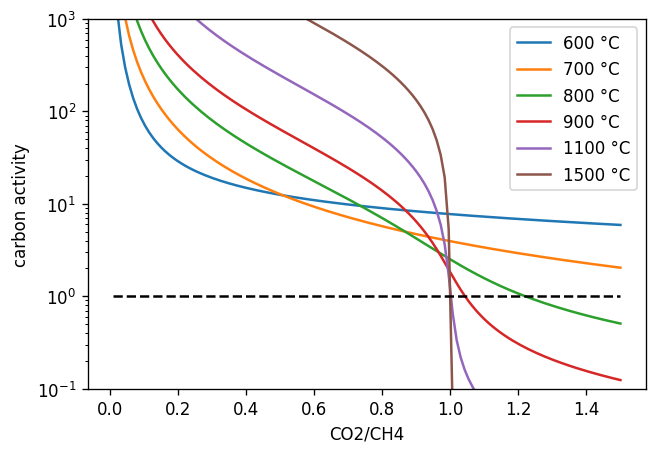

In [8]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.set_xlabel("CO2/CH4")
ax.set_ylabel("carbon activity")
ax.set_ylim(1e-1, 1e3)
ax.set_yscale('log')
ax.plot(ratio, carbon_activity_co2.T)
ax.hlines(1, np.min(ratio), np.max(ratio), colors='k', linestyles='dashed')
ax.legend([f'{tc} °C' for tc in t_range])